# Graded Lab Assignment: Logistic Regression (10 points)

##### Ana Chaloska    

In [194]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


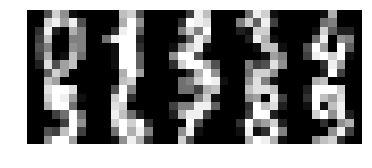

In [525]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

In [628]:
# Prediction function h for logistic regression (sigmoid function)
# Returns the predicted value of y
def prediction_function(x,theta):
    x_predict = 1 / (1 + np.exp(np.dot(-theta.T,x)))
    return x_predict

In [629]:
# Uses the output of the prediction function to compute the cost function J
# Returns the cost
def cost_function(x_predict,y):
    cost=np.add((np.multiply(y,np.log(x_predict))),(np.multiply((1-y), np.log(1-x_predict))))
    cost=-np.sum(cost)/y.shape[0]
    return cost

In [528]:
# Computes the gradient 
def compute_gradient(x_predict, y, x):
    dtheta = (1.0/y.shape[0]) * np.outer(np.subtract(x_predict, y), x.T)
    return dtheta.T

Best score is:  83.5016835017


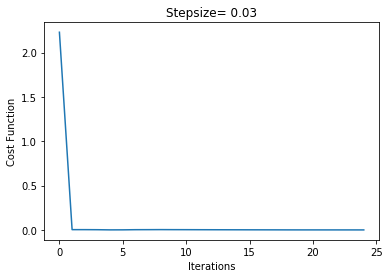

In [639]:
# Chooses a suitable learning rate (stepsize)
alpha=0.03
# Defines the number of iterations
iterations = 25
# Initializes the values of the parameters
theta = np.zeros((64,10))

# Trains the algorithm on a train set containing 1500 examples of the intial data set
x = np.reshape(digits.images[:1500],(1500,64))
target = digits.target[:1500]

# Initializes an empty set A
A=[]
for i in range(iterations):
    # Appends the values of the cost function for every iteration to A
    A.append(cost_function(x_predict,y))    
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:],theta)
        # Creates a y vector with only zeros
        y = np.zeros(10)
        # Sets the right class equal to 1
        y[target[j]] = 1
        # Implements Gradient Descent by the simultaneously updating the parameters
        theta = np.subtract(theta, (alpha*compute_gradient(x_predict, y, x[j,:])))

# To check that there is no overfitting, tests the prediction on a testset containing 297 examples of the intial data set
x_test = np.reshape(digits.images[1500:],(297,64))
target_test = digits.target[1500:]

# Initializes an empty array
array = []
for j in range(x_test.shape[0]):
    x_predict_test = prediction_function(x_test[j,:],theta)
    # Creates a y vector with only zeros
    y = np.zeros(10)
    # Sets the right class equal to 1"
    y[target_test[j]] = 1
    # Every time the predicted value of y matches the actual value of y, adds 1 to the empty array
    # Every time the predicted value of y doesn't match the actal value of y, adds 0 to the empty array
    array.append(int(argmax(x_predict_test) == argmax(y)))
    # Calculates the probability of the best classification done in the testing
    best_score=100 * sum(array)/size(array)
    #print (array)

# Prints the best classificaion score 
print ("Best score is: ", best_score)
# Displays a plot of the cost function for each iteration for a given value of the learning rate (stepsize) alpha
plt.plot(A)
plt.title('Stepsize= %a'  %alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

 ## Summary

The code above performs a logistic regression on a set (MNIST) of 1797 pictures of hadwritten digits. The dataset consists of 1797 examples with 64 features. The logistic regression defines 10 classes, 1 for each digit $({0,1,...,9})$. the classes correspond to the *target* attributes of the examples in the datset. 

First the *hypotesis (sigmoid) function*, *the cost function* and the *gradient function* are defined. Later they are used to implement a *Gradient Descent algorithm*. 

The code then divides the dataset into 2 subsets: training set (containing 1500 examples) and test set (containing 297 examples). The training set is used to train the algorithm and optimize the values of the paramethers $\theta_0, \theta_1, ... \theta_{64}$. Then, the optimized values of the parameters are used to predict the target values of the examples in the test set. 

Based on that, the code computes the best score (probability of best classification). The code can take different values of the learning rate (stepsize, in the code denoted by `alpha`) and different values of the iterations. In the analysis, 4 values of the learning rate for a fixed number of iterations (25) are disscussed. 

The code **successfully** performs logistic regression on the given dataset. It doesn't have the problem of overfitting or underfitting because its hypothesis function is generalized for new data examples (the best score reaches even 88.8).

## Preventing Overfitting 

Overfitting is not an issue here because the learned hypothesis fits the training set very well, and **does not** fail to generalize to new data examples (the ones in the test set). That can be noticed by looking at the best scores obtained by iterating over 4 values of the learning rate (presented in the figure below). Namely, the best scores are sufficienty high $(\approx88.8, \approx87.2, \approx84.5, \approx83.5)$, meaning that the probability of correctly classfying new examples reaches **88.8%**. 

## Systematically choosing Learning Rate 

The plots below represent the values of the cost function of the logistic regression over the 25 iterations, for 4 values of the learning rate, namely 0.001, 0.003, 0.1, 0.3. I chose these values for the learning rate because they are large enough not to make the code very time-expensive, and also small enogh not to neglect the global optima. It is clear from  the plots that the cost function in each of the 4 cases approaches 0 as the number of iterations grows.  Thus, the gradient descent properly approaches the global optimum of the convex function.

Besides, the plots imply that the code works significantly fast because the cost function is very steep after the 1st iteration, and thus the cost approaches 0 even with only a few iterrations. 

## Best Score Analysis 

The plots below show the best classification scores obtained for the (previously defined) 4 different values of of the learning rate. 

For $\alpha = 0.001$, the best score is $88.8888888889$. 

For $\alpha = 0.003$, the best score is $87.2053872054$. 

For $\alpha = 0.01$, the best score is $84.5117845118$. 

For $\alpha = 0.03$, the best score is $83.5016835017$. 

We could notice that as $\alpha$ **increases**, the value of the best score **decreases**. That is because taking smaller stepsizes when updating the values of the parameters, leads to a more accurate approximation of the global optimum of the convex function. 

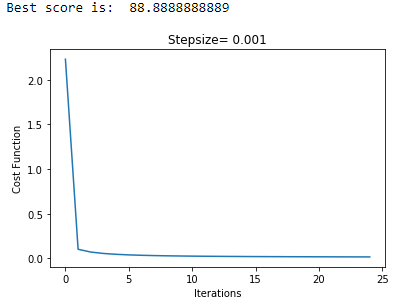

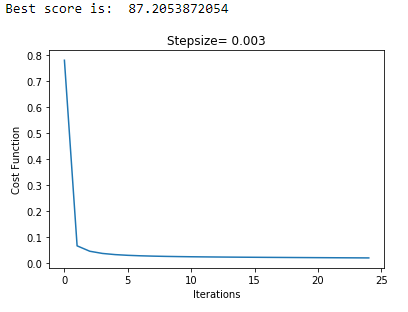

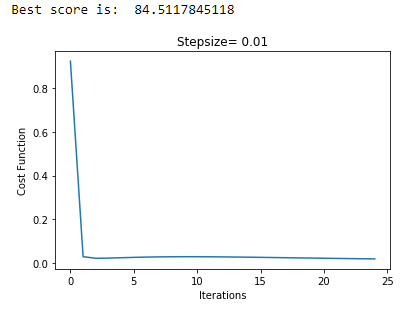

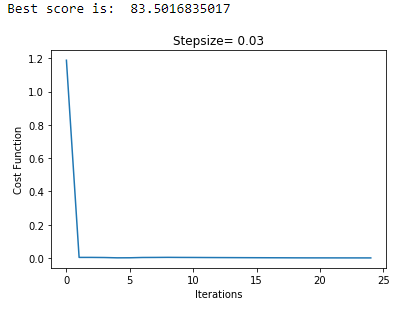